[View in Colaboratory](https://colab.research.google.com/github/PGrabinski/KerasTutorial/blob/master/Chapter2.ipynb)

# Chapter 2: MNIST
To begin, we are working on the famous widely used dateset MNIST. It contains 60k train examples and 10k test examples of$28 \times 28$ grey-scale images . We plot one number to get some intuition.

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


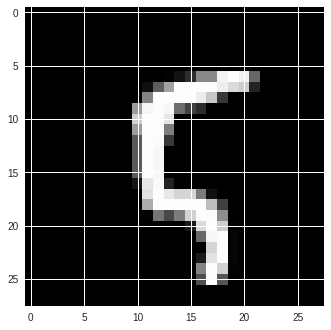

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

plt.imshow(train_data[100], cmap='gray')
print(train_data.shape)
print(test_data.shape)

We set up a simple model with two densly conected layers. The first layer containing $512$ units which will learn features encoded in different parts of the images and the second layer which contains 10 units - one for each number.
For the first layer, we use ReLU activation function to enable possible unlinear behaviours and in the second one we have softmax function which ensures that the probabilities of all categories sum up to 1. And we compile the model with appropiate parameters.

In [0]:
from keras import models
from keras import layers



model = models.Sequential()
model.add(layers.Dense(512, activation='relu' , input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

We transform the data to a from with which we can feed the network. Important aspect is that we normalize the data to $[0,1)$ form as it enables faster learning. And we let the network learn.

In [6]:
from keras.utils.np_utils import to_categorical

x_train = train_data.reshape((60000,28*28)).astype('float32') / 255
y_train = to_categorical(train_labels)

x_test = test_data.reshape((10000,28*28)).astype('float32') / 255
y_test = to_categorical(test_labels)

epochs_num = 10

history = model.fit(x_train, y_train, epochs = epochs_num, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2568 - acc: 0.9261
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1041 - acc: 0.9694
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0705 - acc: 0.9787
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0510 - acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0382 - acc: 0.9885
Epoch 6/10
36736/60000 [=================>............] - ETA: 1s - loss: 0.0287 - acc: 0.9915

60000/60000 [==============================] - 3s 47us/step - loss: 0.0294 - acc: 0.9913
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0227 - acc: 0.9933
Epoch 8/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0170 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0130 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0106 - acc: 0.9972


Now, we can see how did the accuracy and loss function behaved during the learning process. We drop the first epoch data so the diagram is easier to read.

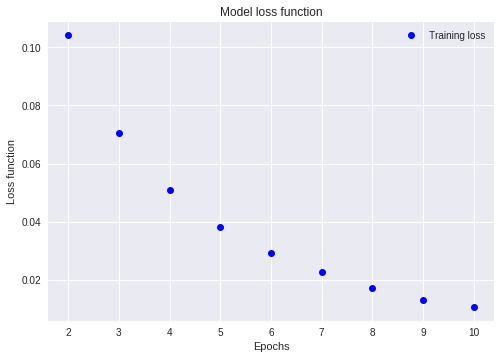

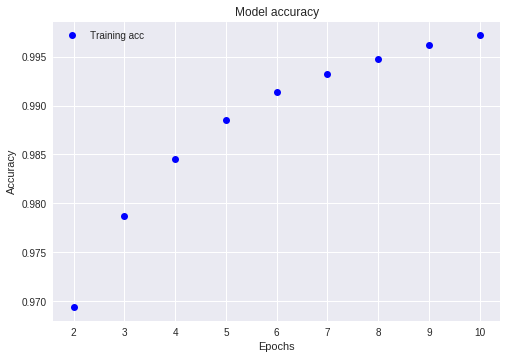

In [12]:
loss_train = history.history['loss']
acc_train = history.history['acc']


epochs = range(1, epochs_num + 1)


import matplotlib.pyplot as plt
plt.plot(epochs[1:], loss_train[1:], 'bo', label="Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.title('Model loss function')
plt.legend()

plt.figure()

plt.plot(epochs[1:], acc_train[1:], 'bo', label="Training acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.legend()
plt.show()


And in the end, we can test our model on the test set.

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy of the model: {}'.format(test_acc))

10000/10000 [==============================] - 1s 62us/step
Accuracy of the model: 0.9823


The performance for such a simple model is highly acceptable.